In [2]:
import os
import matplotlib.pyplot as plt
import numpy
import SimpleITK as sitk
import tensorflow
import gui
from sklearn.model_selection import train_test_split
import cv2

workflow:

1st: 
refresh how where they

images, organizer in library, set them
make sure they are in the correct format with the segmentation labels and the images themselves

2nd: poerme con el tema de u-net y tensorflow

u-net with dropout layers para conseguir uncertainty. what do you think?

In [3]:
def myshow(img):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda)

In [4]:

img_t1 = sitk.ReadImage("..\\..\\BraTS20_Training_001_t1.nii.gz")
img_t1ce = sitk.ReadImage("..\\..\\BraTS20_Training_001_t1ce.nii.gz")
img_t2 = sitk.ReadImage("..\\..\\BraTS20_Training_001_t2.nii.gz")
img_flair = sitk.ReadImage("..\\..\\BraTS20_Training_001_flair.nii.gz")
img_seg = sitk.ReadImage("..\\..\\BraTS20_Training_001_seg.nii.gz")

"""
img_t1 = sitk.Cast(img_t1,sitk.sitkFloat32) #to ceonvert png to sitk
img_t1ce = sitk.Cast(img_t1ce,sitk.sitkFloat32) #to ceonvert png to sitk
img_t2 = sitk.Cast(img,sitk_t2.sitkFloat32) #to ceonvert png to sitk
img_flair = sitk.Cast(img_flair,sitk.sitkFloat32) #to ceonvert png to sitk
img_seg = sitk.Cast(img_seg,sitk.sitkFloat32) #to ceonvert png to sitk

print(img.GetSize())
print(img.GetOrigin()) # the top left corner usually
print(img.GetSpacing()) #physical size of each pixel
print(img.GetDirection()) #3D matrix
print(img.GetNumberOfComponentsPerPixel()) #number of channels in one pixel
"""

width = img_t1.GetWidth()
height = img_t1.GetHeight()
depth = img_t1.GetDepth()

nda_t1 = sitk.GetArrayViewFromImage(img_t1)
nda_t1ce = sitk.GetArrayViewFromImage(img_t1ce)
nda_t2 = sitk.GetArrayViewFromImage(img_t2)
nda_flair = sitk.GetArrayViewFromImage(img_flair)
nda_seg = sitk.GetArrayViewFromImage(img_seg)

(-0.5, 239.5, 239.5, -0.5)

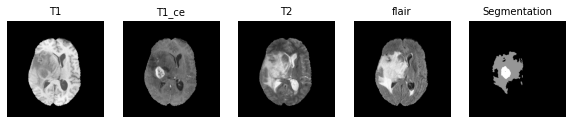

In [5]:
npa_zslice_t1 = sitk.GetArrayViewFromImage(img_t1)[int(depth/2),:,:]
npa_zslice_t1ce = sitk.GetArrayViewFromImage(img_t1ce)[int(depth/2),:,:]
npa_zslice_t2 = sitk.GetArrayViewFromImage(img_t2)[int(depth/2),:,:]
npa_zslice_flair = sitk.GetArrayViewFromImage(img_flair)[int(depth/2),:,:]
npa_zslice_seg = sitk.GetArrayViewFromImage(img_seg)[int(depth/2),:,:]

fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,5,1)
plt.imshow(npa_zslice_t1, cmap=plt.cm.Greys_r)
plt.title('T1', fontsize=10)
plt.axis('off')

fig.add_subplot(1,5,2)
plt.imshow(npa_zslice_t1ce, cmap=plt.cm.Greys_r)
plt.title('T1_ce', fontsize=10)
plt.axis('off')

fig.add_subplot(1,5,3)
plt.imshow(npa_zslice_t2, cmap=plt.cm.Greys_r)
plt.title('T2', fontsize=10)
plt.axis('off')

fig.add_subplot(1,5,4)
plt.imshow(npa_zslice_flair, cmap=plt.cm.Greys_r)
plt.title('flair', fontsize=10)
plt.axis('off')

fig.add_subplot(1,5,5)
plt.imshow(npa_zslice_seg, cmap=plt.cm.Greys_r)
plt.title('Segmentation', fontsize=10)
plt.axis('off')

In [6]:
ImgDir = "..\\..\\MICCAI_BraTS2020_TrainingData"
features_path = list()
labels_path = list()

for folder in os.listdir(ImgDir):
    if 'Training' in folder:
        new_dir = f"{ImgDir}\\{folder}"
        data = os.listdir(new_dir)
        for files in data:
            if 'flair' in files:
                features_path.append(new_dir +"\\"+ files)
            if 'seg' in files:
                labels_path.append(new_dir +"\\"+ files)

print(len(features_path))
print(len(labels_path))

X=features_path
y=labels_path

369
369


In [7]:
len(X)
len(y)

369

In [13]:


X = list()
y = list()

for path in features_path:
    img = sitk.ReadImage(path)
    nda_img = sitk.GetArrayViewFromImage(img) / 255.
    X.append(nda_img)

for path in labels_path:
    img = sitk.ReadImage(path)
    nda_img = sitk.GetArrayViewFromImage(img) / 255.
    y.append(nda_img)
    
X = np.array(X)
y = np.array(y)

MemoryError: Unable to allocate 68.1 MiB for an array with shape (155, 240, 240) and data type float64

In [ ]:
X.shape

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

In [9]:
print(X_train)

['..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_160\\BraTS20_Training_160_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_261\\BraTS20_Training_261_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_361\\BraTS20_Training_361_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_274\\BraTS20_Training_274_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_331\\BraTS20_Training_331_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_012\\BraTS20_Training_012_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_068\\BraTS20_Training_068_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_019\\BraTS20_Training_019_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_066\\BraTS20_Training_066_flair.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_170\\BraTS20_Training_170_flair.nii.gz', '..\\..\\MICCAI_Bra

In [9]:
print(y_train)

['..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_160\\BraTS20_Training_160_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_261\\BraTS20_Training_261_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_361\\BraTS20_Training_361_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_274\\BraTS20_Training_274_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_331\\BraTS20_Training_331_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_012\\BraTS20_Training_012_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_068\\BraTS20_Training_068_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_019\\BraTS20_Training_019_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_066\\BraTS20_Training_066_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\\BraTS20_Training_170\\BraTS20_Training_170_seg.nii.gz', '..\\..\\MICCAI_BraTS2020_TrainingData\

In [10]:
IMG_HEIGHT = width
IMG_WIDTH = height
epochs = 50
batch_size = 16

In [11]:
def keras_generator_train_val_test(batch_size, choice="train"):

    if choice == "train":
        X = X_train
        y = y_train
    elif choice == "val":
        X = X_val
        y = y_val
    else:
        print("Invalid Option")
        return False
        
    while True:
        x_batch = []
        y_batch = []

        for i in range(batch_size):
            
            x = sitk.ReadImage(X[i])
            x_np = sitk.GetArrayViewFromImage(x) / 255.
            y = sitk.ReadImage(y[i])
            y_np = sitk.GetArrayViewFromImage(y) / 255.
            
            x_batch.append(x_np)
            y_batch.append(y_np)

        
        x_batch = np.array(x_batch)
        # y_batch = np.array(y_batch)

        y_batch = {'seg': np.array(y_batch),
                #    'cls': np.array(classification_list)
                }

        yield x_batch, y_batch

for x, y in keras_generator_train_val_test(2, choice="train"):
    break

print(x.shape, y['seg'].shape)

TypeError: in method 'ImageSeriesReader_SetFileNames', argument 2 of type 'std::vector< std::string,std::allocator< std::string > > const &'